In [1]:
import numpy as np

# generate time series
def generate_time_series(batch_size: int, n_steps: int) -> np.ndarray:
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [2]:
data = generate_time_series(32, 15)

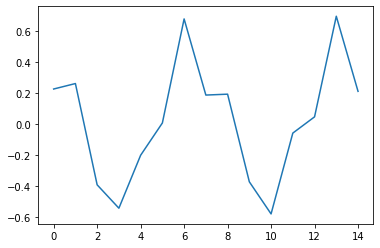

In [3]:
import matplotlib.pyplot as plt

plt.plot(data[0])

In [4]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

#simple Feedforward Net

In [5]:
INPUT_SHAPE = X_train.shape[1:]

In [15]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import Sequential

ffn = Sequential([
    Flatten(input_shape=INPUT_SHAPE),
    Dense(1)
])

ffn.compile(optimizer="Adam", loss="mean_squared_error")

In [21]:
ffn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [16]:
ffn.fit(
    X_train, 
    y_train, 
    epochs=20,
    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0312 - val_loss: 0.0120
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0091 - val_loss: 0.0071
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0066 - val_loss: 0.0058
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0057 - val_loss: 0.0053
Epoch 5/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 6/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 7/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 8/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 9/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 10/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0041 - val_loss: 0.0040

In [19]:
ffn.evaluate(X_test, y_test)

32/32 [==============================] - 0s 4ms/step - loss: 0.0034


0.0034033041447401047

#RNN

In [17]:
# simple RNN
from tensorflow.keras.layers import SimpleRNN

simple_rnn = Sequential([SimpleRNN(1, input_shape=[None, 1])])
simple_rnn.compile(optimizer='Adam', loss="mean_squared_error")

In [20]:
simple_rnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [18]:
simple_rnn.fit(
    X_train, 
    y_train, 
    epochs=20,
    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 8s 35ms/step - loss: 0.0336 - val_loss: 0.0252
Epoch 2/20
219/219 [==============================] - 7s 34ms/step - loss: 0.0203 - val_loss: 0.0162
Epoch 3/20
219/219 [==============================] - 7s 34ms/step - loss: 0.0140 - val_loss: 0.0123
Epoch 4/20
219/219 [==============================] - 9s 40ms/step - loss: 0.0117 - val_loss: 0.0112
Epoch 5/20
219/219 [==============================] - 9s 43ms/step - loss: 0.0111 - val_loss: 0.0110
Epoch 6/20
219/219 [==============================] - 8s 36ms/step - loss: 0.0110 - val_loss: 0.0110
Epoch 7/20
219/219 [==============================] - 7s 34ms/step - loss: 0.0110 - val_loss: 0.0110
Epoch 8/20
219/219 [==============================] - 7s 34ms/step - loss: 0.0110 - val_loss: 0.0110
Epoch 9/20
219/219 [==============================] - 8s 37ms/step - loss: 0.0110 - val_loss: 0.0110
Epoch 10/20
219/219 [==============================] - 7s 34ms/step - loss: 0.0110 - val_lo

In [22]:
simple_rnn.evaluate(X_test, y_test)

32/32 [==============================] - 0s 5ms/step - loss: 0.0119


0.011912493966519833

In [24]:
# "deep"-RNN
rnn = Sequential([
    SimpleRNN(units=20, return_sequences=True, input_shape=[None, 1]),
    SimpleRNN(units=20, return_sequences=True),
    SimpleRNN(units=1)
])

rnn.compile(optimizer="Adam", loss="mean_squared_error")

In [25]:
rnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, None, 20)          820       
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 1)                 22        
                                                                 
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [26]:
rnn.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_valid, y_valid)
)

Epoch 1/20
219/219 [==============================] - 33s 144ms/step - loss: 0.0096 - val_loss: 0.0033
Epoch 2/20
219/219 [==============================] - 27s 123ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 3/20
219/219 [==============================] - 27s 123ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 4/20
219/219 [==============================] - 27s 124ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 5/20
219/219 [==============================] - 27s 123ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 6/20
219/219 [==============================] - 27s 122ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 7/20
219/219 [==============================] - 27s 124ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 8/20
219/219 [==============================] - 27s 122ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 9/20
219/219 [==============================] - 27s 123ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 10/20
219/219 [==============================] - 27s 122ms/step - l

In [27]:
rnn.evaluate(X_test, y_test)

32/32 [==============================] - 0s 14ms/step - loss: 0.0027


0.0026919953525066376

To be continued (Aurelien Geron - Page 511)